In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
training_set = pd.read_csv('Wordle.csv')
# print(training_set)
X = training_set.iloc[:,2:3].values
# X

In [19]:
# Define an alphabet
alphabet = "abcdefghijklmnopqrstuvwxyz"

# Vectorize a letter
def letter_to_vector(letter):
    vector = np.zeros(26)
    index = alphabet.index(letter)
    vector[index] = 1
    return vector

# Tensorize a word
def word_to_tensor(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.array(vectors)


# Vectorize a word
def word_to_vector(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.concatenate(vectors)


In [20]:
word_vec=[[ ],[ ],[ ],[ ]]
for i in range(len(X)):
    word=X[i][0]
    # Vectorize the words
    tensor = word_to_tensor(word)
    vector = word_to_vector(word)
    word_vec[0].append(word)
    word_vec[1].append(tensor)
    word_vec[2].append(vector)
word_vec

[['slump',
  'crank',
  'gorge',
  'query',
  'drink',
  'favor',
  'abbey',
  'tangy',
  'panic',
  'solar',
  'shire',
  'proxy',
  'point',
  'robot',
  'prick',
  'wince',
  'crimp',
  'knoll',
  'sugar',
  'whack',
  'mount',
  'perky',
  'could',
  'wrung',
  'light',
  'those',
  'moist',
  'shard',
  'pleat',
  'aloft',
  'skill',
  'elder',
  'frame',
  'humor',
  'pause',
  'ulcer',
  'ultra',
  'robin',
  'cynic',
  'aroma',
  'caulk',
  'shake',
  'dodge',
  'swill',
  'tacit',
  'other',
  'thorn',
  'trove',
  'bloke',
  'vivid',
  'spill',
  'chant',
  'choke',
  'rupee',
  'nasty',
  'mourn',
  'ahead',
  'brine',
  'cloth',
  'hoard',
  'sweet',
  'month',
  'lapse',
  'watch',
  'today',
  'focus',
  'smelt',
  'tease',
  'cater',
  'movie',
  'saute',
  'allow',
  'renew',
  'their',
  'slosh',
  'purge',
  'chest',
  'depot',
  'epoxy',
  'nymph',
  'found',
  'shall',
  'stove',
  'lowly',
  'snout',
  'trope',
  'fewer',
  'shawl',
  'natal',
  'comma',
  'foray',

In [21]:
# Calculate the Euclid distance of words
with open('points.csv','w+') as f:
    for i in range(len(word_vec[0])):
        for j in range(len(word_vec[0])):
            dist = np.linalg.norm(word_vec[1][i] - word_vec[1][j])
            print(word_vec[0][i],',',word_vec[0][j],',', dist,file=f)

E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


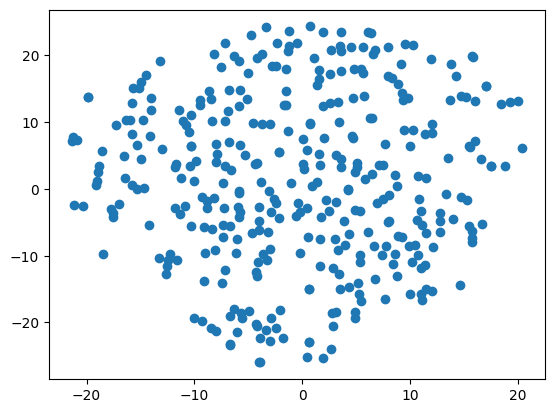

[[ 1.68225634e+00 -7.56053734e+00]
 [-7.32147264e+00  9.34600711e-01]
 [-7.48878622e+00  1.82249660e+01]
 [ 9.23499775e+00  1.43907728e+01]
 [-8.14787388e+00 -1.31178641e+00]
 [ 1.14061689e+01  8.15888500e+00]
 [ 4.61513424e+00  7.88059902e+00]
 [ 3.62103939e+00  2.06299953e+01]
 [-2.12970505e+01  7.71149683e+00]
 [ 3.14486098e+00 -1.84289970e+01]
 [ 9.23552322e+00 -7.14282608e+00]
 [ 2.56804967e+00  1.28398724e+01]
 [-8.40467739e+00  1.02278728e+01]
 [ 6.46695375e+00  1.06258345e+01]
 [-7.25878716e+00 -2.89633322e+00]
 [ 1.75339222e+01  3.40766501e+00]
 [-5.88466406e+00 -5.79457462e-01]
 [ 8.06099319e+00 -9.49036539e-01]
 [ 4.91913414e+00 -1.84945145e+01]
 [ 1.14883356e+01  1.59010732e+00]
 [-8.46813965e+00  1.34670181e+01]
 [ 9.17906475e+00  1.86483650e+01]
 [-5.79116058e+00  1.47784443e+01]
 [ 2.01625967e+00  7.63408041e+00]
 [-1.98624325e+01  1.38343906e+01]
 [ 1.10625868e+01 -3.32970476e+00]
 [-1.02937584e+01  1.11395950e+01]
 [ 1.07130690e+01 -9.82232094e+00]
 [-5.26955318e+00  5

In [22]:
from sklearn.manifold import TSNE
tsneData = TSNE().fit_transform(word_vec[2])
#Visualize the distance of words
f = plt.figure
ax = plt.subplot(aspect='auto')
sc = ax.scatter(tsneData[:,0], tsneData[:,1])
plt.show()
print(tsneData)

In [23]:
from sklearn.cluster import KMeans
n_clusters=1
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
dist_min = np.linalg.norm(word_vec[2][0] - centroid)
dist_min_word = [word_vec[0][0]]
for i in range(len(word_vec[0])):
    dist = np.linalg.norm(word_vec[2][i] - centroid)
    if(dist<dist_min):
        dist_min = dist
        dist_min_word = word_vec[0][i]
    elif(dist==dist_min):
        dist_min_word.append(word_vec[0][i])
    print('The best bigin guess: ',dist_min_word)
    

The best bigin guess:  ['slump', 'slump']
The best bigin guess:  crank
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  solar
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
T

In [24]:
n_clusters=5
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
y_pred = cluster.labels_
# Label the words with Euclid distance
words=[]
Y=[1,2,3,4,5,6,7]
centtrod = cluster.cluster_centers_
color=['blue','orange','green','purple','brown','pink','gray','olive','cyan']
# for i in range(n_clusters):